In [0]:
from google.colab import files
files.upload()

In [0]:
from google.colab import files
files.upload()

In [0]:
!unzip /content/train.zip

In [0]:
!python3 mealybug.py train --dataset=/content/train --model=coco

Using TensorFlow backend.
Traceback (most recent call last):
  File "mealybug.py", line 47, in <module>
    import model as modellib
  File "/content/model.py", line 26, in <module>
    from mrcnn import utils
ModuleNotFoundError: No module named 'mrcnn'


In [0]:
!git clone https://github.com/matterport/Mask_RCNN.git

In [0]:
import os

In [0]:
os.chdir('/content/Mask_RCNN')

In [4]:
from google.colab import files
files.upload()

Saving mealybug.py to mealybug.py


{'mealybug.py': b'"""\r\nMask R-CNN\r\nTrain on the toy mealybug dataset and implement color splash effect.\r\n\r\nCopyright (c) 2018 Matterport, Inc.\r\nLicensed under the MIT License (see LICENSE for details)\r\nWritten by Waleed Abdulla\r\n\r\n------------------------------------------------------------\r\n\r\nUsage: import the module (see Jupyter notebooks for examples), or run from\r\n       the command line as such:\r\n\r\n    # Train a new model starting from pre-trained COCO weights\r\n    python3 mealybug.py train --dataset=/path/to/mealybug/dataset --weights=coco\r\n\r\n    # Resume training a model that you had trained earlier\r\n    python mealybug.py train --dataset=F:\\samples\\active\\train --weights=last\r\n\r\n    # Train a new model starting from ImageNet weights\r\n    python mealybug.py train --dataset=F:\\samples\\active\\train --weights=imagenet\r\n\r\n    # Apply color splash to an image\r\n    python3 mealybug.py splash --weights=/path/to/weights/file.h5 --image

In [6]:
from google.colab import files
files.upload()

Saving component.py to component.py
Saving config.py to config.py
Saving utils.py to utils.py
Saving visualize.py to visualize.py


{'component.py': b'"""\r\nMask R-CNN\r\nTrain on the toy component dataset and implement color splash effect.\r\n\r\nCopyright (c) 2018 Matterport, Inc.\r\nLicensed under the MIT License (see LICENSE for details)\r\nWritten by Waleed Abdulla\r\n\r\n------------------------------------------------------------\r\n\r\nUsage: import the module (see Jupyter notebooks for examples), or run from\r\n       the command line as such:\r\n\r\n    # Train a new model starting from pre-trained COCO weights\r\n    python3 component.py train --dataset=/path/to/component/dataset --weights=coco\r\n\r\n    # Resume training a model that you had trained earlier\r\n    python component.py train --dataset=F:\\samples\\active\\train --weights=last\r\n\r\n    # Train a new model starting from ImageNet weights\r\n    python component.py train --dataset=F:\\samples\\active\\train --weights=imagenet\r\n\r\n    # Apply color splash to an image\r\n    python3 component.py splash --weights=/path/to/weights/file.h5 

In [15]:
from google.colab import files
files.upload()

Saving mealybug.py to mealybug.py


{'mealybug.py': b'"""\r\nMask R-CNN\r\nTrain on the toy mealybug dataset and implement color splash effect.\r\n\r\nCopyright (c) 2018 Matterport, Inc.\r\nLicensed under the MIT License (see LICENSE for details)\r\nWritten by Waleed Abdulla\r\n\r\n------------------------------------------------------------\r\n\r\nUsage: import the module (see Jupyter notebooks for examples), or run from\r\n       the command line as such:\r\n\r\n    # Train a new model starting from pre-trained COCO weights\r\n    python3 mealybug.py train --dataset=/path/to/mealybug/dataset --weights=coco\r\n\r\n    # Resume training a model that you had trained earlier\r\n    python mealybug.py train --dataset=F:\\samples\\active\\train --weights=last\r\n\r\n    # Train a new model starting from ImageNet weights\r\n    python mealybug.py train --dataset=F:\\samples\\active\\train --weights=imagenet\r\n\r\n    # Apply color splash to an image\r\n    python3 mealybug.py splash --weights=/path/to/weights/file.h5 --image

In [17]:
!python3 mealybug.py train --dataset=/content/train --weights=coco

Using TensorFlow backend.
Weights:  coco
Dataset:  /content/train
Logs:  /content/Mask_RCNN/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrc

In [22]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.getcwd()
#if ROOT_DIR.endswith("samples/balloon"):
    # Go up two levels to the repo root
    #ROOT_DIR = os.path.dirname(os.path.dirname(ROOT_DIR))

# Import Mask RCNN
sys.path.append(ROOT_DIR)
import utils
import visualize
from visualize import display_images
import model as modellib
from model import log

import mealybug



# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
BALLON_WEIGHTS_PATH = "/content/Mask_RCNN/logs/mealybug20190910T1035/mask_rcnn_mealybug_0005.h5"  # TODO: update this path

config = mealybug.mealybugConfig()
BALLOON_DIR = "/content/train/"

# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"


def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

# Load validation dataset
dataset = mealybug.mealybugDataset()
dataset.load_mealybug(BALLOON_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))


with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)


weights_path = "/content/Mask_RCNN/logs/mealybug20190910T1035/mask_rcnn_mealybug_0005.h5"

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)
print("done loading weights")



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

image ID: mealybug.15coco20mb1.jpg resized.jpg (0) /content/train/val/15coco20mb1.jpg resized.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


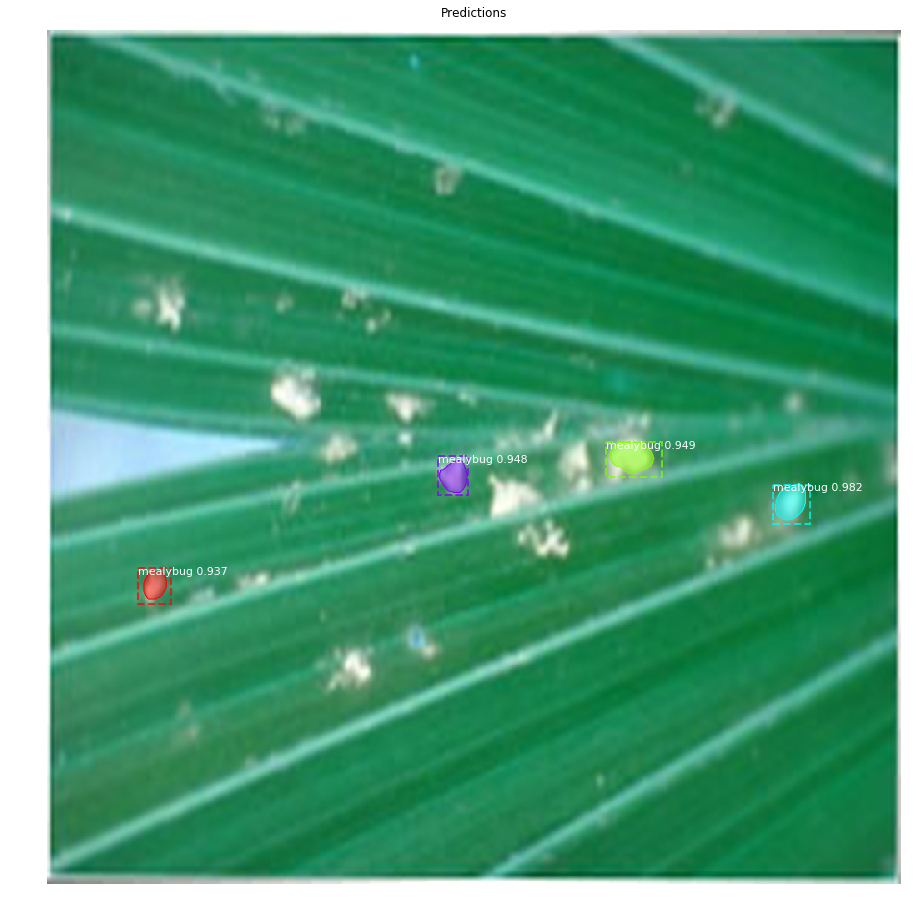

gt_class_id              shape: (13,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (13, 4)               min:  107.00000  max:  908.00000  int32
gt_mask                  shape: (1024, 1024, 13)      min:    0.00000  max:    1.00000  uint8
done


In [23]:
image_id =0 #random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))


# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
print("done")

image ID: mealybug.15coco20mb1.jpg resized.jpg (0) /content/train/val/15coco20mb1.jpg resized.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


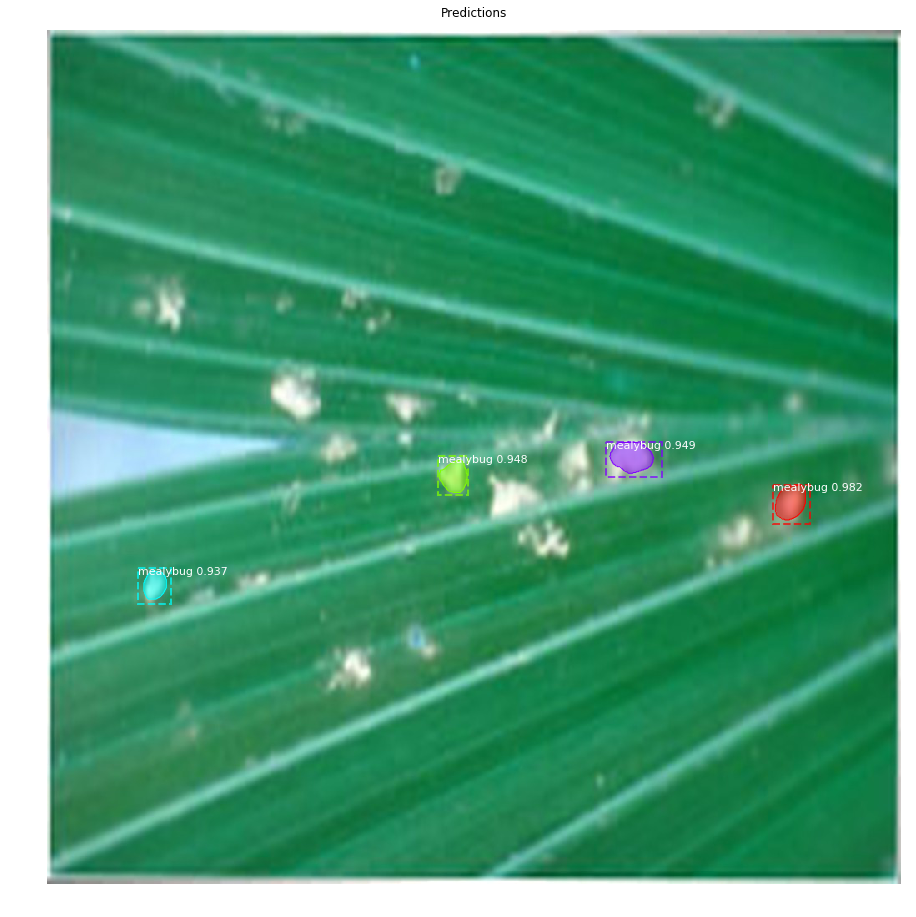

gt_class_id              shape: (13,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (13, 4)               min:  107.00000  max:  908.00000  int32
gt_mask                  shape: (1024, 1024, 13)      min:    0.00000  max:    1.00000  uint8
done


In [24]:
image_id =0 #random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))


# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
print("done")

image ID: mealybug.15coco20mb2.jpg resized.jpg (1) /content/train/val/15coco20mb2.jpg resized.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


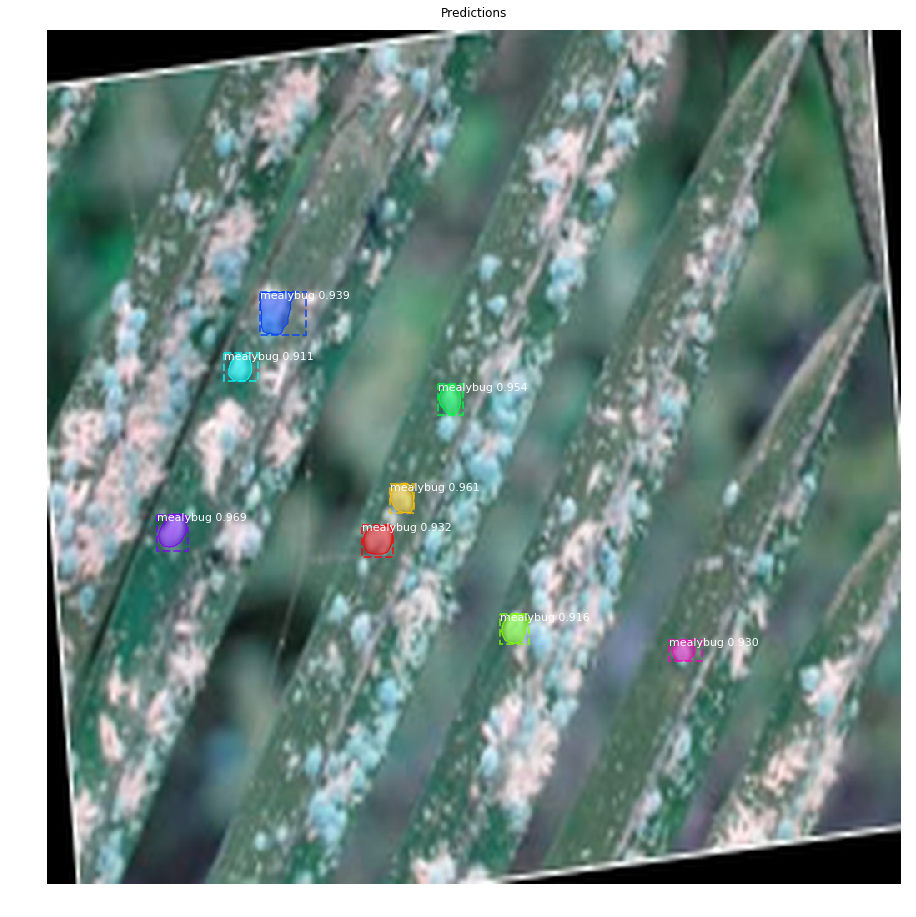

gt_class_id              shape: (11,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (11, 4)               min:   12.00000  max:  982.00000  int32
gt_mask                  shape: (1024, 1024, 11)      min:    0.00000  max:    1.00000  uint8
done


In [25]:
image_id =1 #random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))


# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
print("done")

image ID: mealybug.15coco20mb3.jpg resized.jpg (2) /content/train/val/15coco20mb3.jpg resized.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


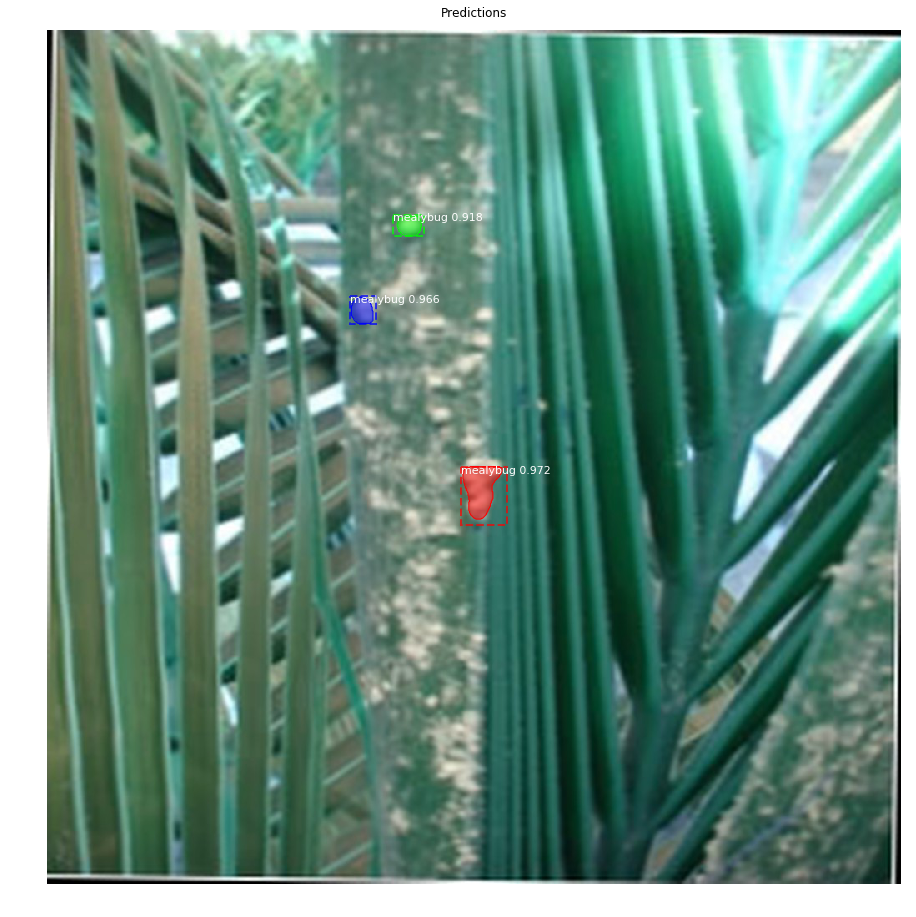

gt_class_id              shape: (4,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (4, 4)                min:  278.00000  max:  973.00000  int32
gt_mask                  shape: (1024, 1024, 4)       min:    0.00000  max:    1.00000  uint8
done


In [26]:
image_id =2 #random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))


# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
print("done")